# 📌 Gaussian Mixture Model (GMM) Clustering

## 🔹 Overview
Gaussian Mixture Model (GMM) is a **probabilistic clustering method** that assumes data is generated from a mixture of several Gaussian distributions. Unlike k-means, which assigns each data point to a single cluster, GMM assigns probabilities to indicate how likely a point belongs to each cluster.

---

## 🛠 Steps of GMM Clustering
1. **Initialize Parameters** 🎯  
   - Choose the number of clusters (**K**).
   - Initialize Gaussian distributions with random means, covariances, and mixing coefficients.

2. **Expectation Step (E-Step)** 📊  
   - Compute the probability (responsibility) of each data point belonging to each Gaussian distribution.

3. **Maximization Step (M-Step)** 🔄  
   - Update parameters (means, covariances, and mixing coefficients) to maximize the likelihood of the data.

4. **Check for Convergence** ✅  
   - Repeat E-Step and M-Step until parameters stabilize or reach a maximum number of iterations.

---

## 📊 Suitable Data for GMM
- Data that follows **Gaussian (Normal) distributions**.
- Overlapping clusters where **soft clustering** is preferred.
- Data with **different cluster shapes** (e.g., elliptical clusters).

---

## 📌 Assumptions of GMM
- The data is generated from a **mixture of Gaussian distributions**.
- The number of clusters (**K**) is known or estimated.
- Each cluster has its own **mean, covariance, and weight**.
- Data points are **independent** and identically distributed (**i.i.d. assumption**).

---

## 📏 Evaluation Metrics for GMM
- **Log-Likelihood** 📈 → Measures how well the model fits the data.
- **Akaike Information Criterion (AIC)** 🏆 → Penalizes model complexity.
- **Bayesian Information Criterion (BIC)** 🏅 → Prefers simpler models when possible.
- **Silhouette Score** 📊 → Measures cluster separation.
- **Davies-Bouldin Index** 🔍 → Evaluates compactness and separation of clusters.

---

## ✅ Advantages of GMM
✔ **Soft Clustering** → Assigns probabilities instead of hard labels.  
✔ **Handles Elliptical Clusters** → Unlike k-means, which assumes spherical clusters.  
✔ **More Flexible Than K-Means** → Can capture more complex distributions.  

## ❌ Disadvantages of GMM
❌ **Computationally Expensive** → More complex than k-means.  
❌ **Sensitive to Initialization** → Poor initialization can lead to bad results.  
❌ **Overfitting Risk** → If **K** is too large, it may fit noise in the data.  

---

## 🔥 GMM Secrets & Tricks
🔹 **Use AIC/BIC** to determine the optimal number of clusters (**K**).  
🔹 **Initialize with k-means** to improve parameter initialization.  
🔹 **Normalize Data** before applying GMM to prevent bias.  
🔹 **Regularization** → Prevents singular covariance matrices.  
🔹 **Try Diagonal Covariance Matrices** if full covariance leads to overfitting.  

🚀 GMM is a powerful clustering technique when used correctly! 🔥

<br>

---

<br>

## 🟤 Import Libraries 📚<br>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from scipy.stats import multivariate_normal
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA

<br>

## 🔵 Read Dataset 📊📥

In [2]:
data = pd.read_csv('Clustering_gmm (2).csv')

<br>

## 🟣 Exploratory Data Analysis (EDA) 📈🔍

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  500 non-null    float64
 1   Height  500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [5]:
data.describe()

,Weight,Height
count,500.000000,500.000000
mean,61.270240,169.515781
std,5.196976,4.805095
min,50.433644,160.182164
25%,57.772791,166.607599
50%,61.961518,169.726252
75%,65.439332,172.837284
max,70.700456,178.894770


In [3]:
data.isnull().sum()

Weight    0
Height    0
dtype: int64

In [6]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

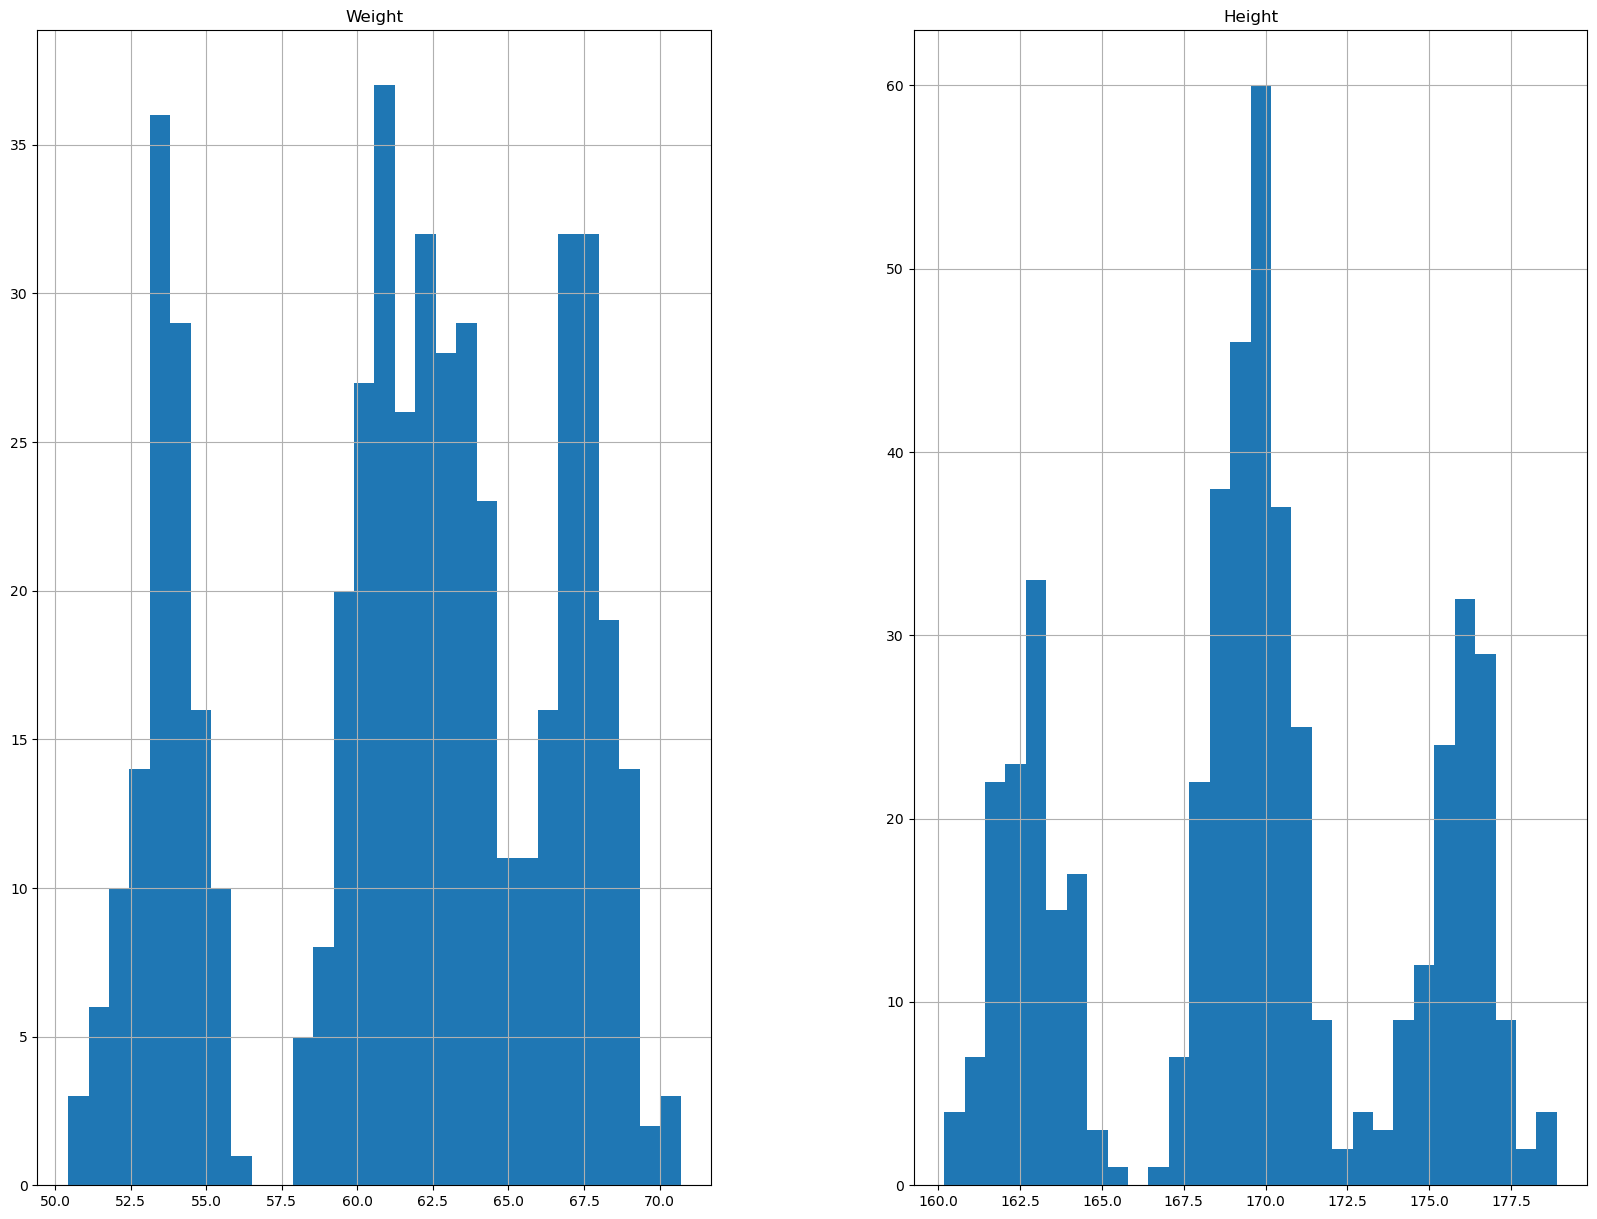

In [4]:
data.hist(bins=30, figsize=(20,15))
plt.show()

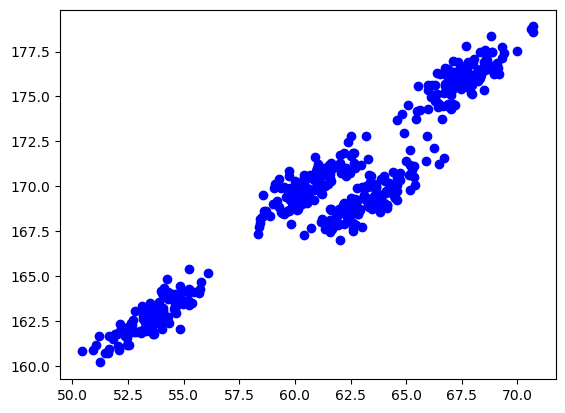

In [7]:
plt.scatter(data['Weight'], data['Height'], color='blue')
plt.show()

<br>

## 🟡 Scaling the data ⚖️🔢

In [9]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

<br>

## 🔴 Model 🤖📌

<br>
<h3>Using SKlearn 🤖📚<h3>

In [10]:
n_clusters = range(1, 11)
bic_scores = []

for n in n_clusters:
    gmm = GaussianMixture(n_components=n, random_state=0)
    gmm.fit(data_scaled)
    bic_scores.append(gmm.bic(data_scaled))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

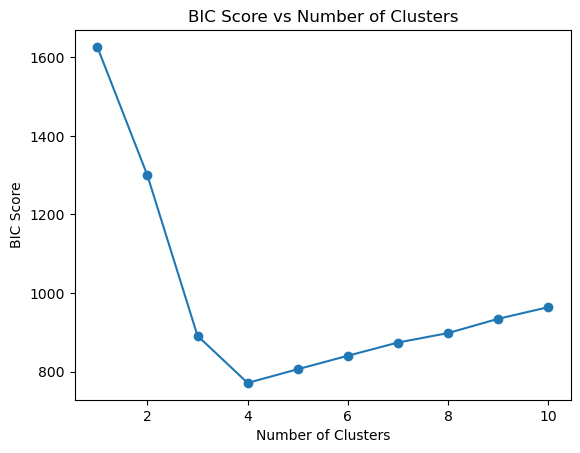

In [11]:
plt.plot(n_clusters, bic_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score')
plt.title('BIC Score vs Number of Clusters')
plt.show()

In [12]:
optimal_n_clusters = np.argmin(bic_scores) + 1
gmm = GaussianMixture(n_components=optimal_n_clusters, random_state=0)
gmm.fit(data_scaled)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


GaussianMixture(n_components=4, random_state=0)

In [13]:
predicted_clusters = gmm.predict(data_scaled)

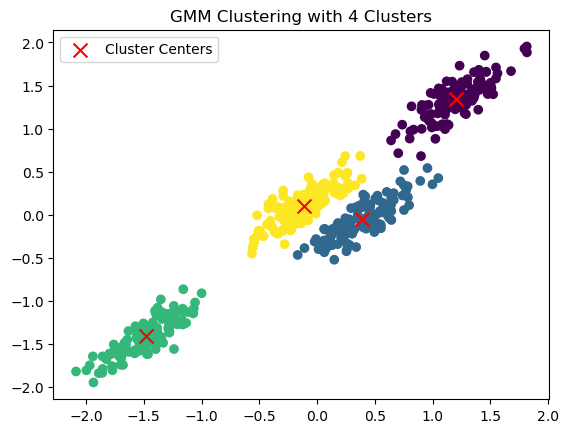

In [14]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=predicted_clusters, cmap='viridis')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker='x', s=100, color='red', label='Cluster Centers')
plt.legend()
plt.title(f'GMM Clustering with {optimal_n_clusters} Clusters')
plt.show()

<br>
<h3>From Scratch 🤖📚<h3>

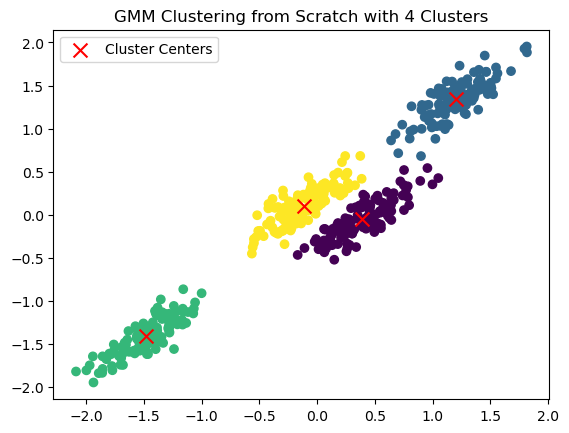

In [24]:
# Generate a synthetic dataset
n_samples = 300
n_features = 2
n_clusters = 4
random_state = 42

data, true_labels = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

# Implement GMM from scratch
def gmm(X, n_clusters, n_iterations=100):
    n_samples, n_features = X.shape
    means = X[np.random.choice(n_samples, n_clusters, replace=False)]
    covariances = [np.eye(n_features)] * n_clusters
    weights = np.ones(n_clusters) / n_clusters

    for _ in range(n_iterations):
        # E-step
        responsibilities = []
        for k in range(n_clusters):
            numerator = multivariate_normal.pdf(X, mean=means[k], cov=covariances[k]) * weights[k]
            responsibilities.append(numerator)
        responsibilities = np.array(responsibilities).T
        responsibilities /= responsibilities.sum(axis=1, keepdims=True)

        # M-step
        total_resp = np.sum(responsibilities, axis=0)
        weights = total_resp / n_samples
        means = (responsibilities.T @ X) / total_resp[:, np.newaxis]
        for k in range(n_clusters):
            diff = X - means[k]
            covariances[k] = ((responsibilities[:, k] * diff.T) @ diff) / total_resp[k]

    return means, covariances, weights

# Fit GMM from scratch
estimated_means, estimated_covariances, estimated_weights = gmm(data_scaled, n_clusters)

# Assign samples to clusters
def assign_clusters(X, means, covariances, weights):
    n_samples = X.shape[0]
    n_clusters = len(means)
    responsibilities = np.zeros((n_samples, n_clusters))
    for k in range(n_clusters):
        responsibilities[:, k] = multivariate_normal.pdf(X, mean=means[k], cov=covariances[k]) * weights[k]
    cluster_assignments = np.argmax(responsibilities, axis=1)
    return cluster_assignments

predicted_assignments = assign_clusters(data_scaled, estimated_means, estimated_covariances, estimated_weights)

# Visualize the results
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=predicted_assignments, cmap='viridis')
plt.scatter(estimated_means[:, 0], estimated_means[:, 1], marker='x', s=100, color='red', label='Cluster Centers')
plt.legend()
plt.title(f'GMM Clustering from Scratch with {n_clusters} Clusters')
plt.show()

## 📚 References
1. **In-Depth: Gaussian Mixture Models**  
   A comprehensive guide on GMMs, covering the theory and practical implementation.  
   [https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html](https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html)

2. **Gaussian Mixture Models Clustering - Explained**  
   An in-depth explanation of GMM clustering with examples.  
   [https://www.kaggle.com/code/vipulgandhi/gaussian-mixture-models-clustering-explained](https://www.kaggle.com/code/vipulgandhi/gaussian-mixture-models-clustering-explained)

3. **Cluster Using Gaussian Mixture Model**  
   A detailed tutorial on clustering with GMMs using MATLAB.  
   [https://www.mathworks.com/help/stats/clustering-using-gaussian-mixture-models.html](https://www.mathworks.com/help/stats/clustering-using-gaussian-mixture-models.html)

4. **Gaussian Mixture Model - GeeksforGeeks**  
   An article explaining the fundamentals of GMMs.  
   [https://www.geeksforgeeks.org/gaussian-mixture-model/](https://www.geeksforgeeks.org/gaussian-mixture-model/)

5. **Gaussian Mixture Model Explained | Built In**  
   A detailed article on GMMs with practical insights.  
   [https://builtin.com/articles/gaussian-mixture-model](https://builtin.com/articles/gaussian-mixture-model)

6. **Gaussian Mixture Models : Clustering Algorithm Python**  
   A tutorial on implementing GMMs in Python.  
   [https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/](https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/)

